# Audio Data
Performed detailed data prepping and processing on audio data

In [21]:
!pip install h2o
!pip install noisereduce
!pip install sklearn


  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post10-py3-none-any.whl size=2959 sha256=147e0f39294bc4c751125375860bf8737fa3eb497f24e443b684d2a96b33652f
  Stored in directory: /root/.cache/pip/wheels/5b/f6/92/0173054cc528db7ffe7b0c7652a96c3102aab156a6da960387
Successfully built sklearn


## Step 1: EDA

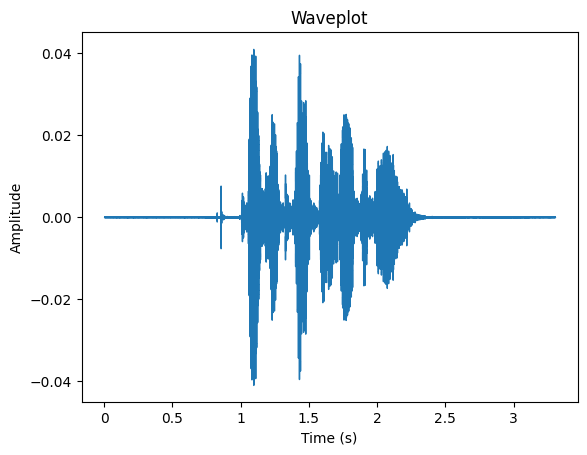

(22050, 3.3033106575963718)

In [4]:
import librosa
import librosa.display
from matplotlib import pyplot as plt

# Load one of the audio files to explore its properties
audio_path = '/content/03-01-01-01-01-01-01.wav'
audio_data, sample_rate = librosa.load(audio_path)

# Display the audio waveplot
librosa.display.waveshow(audio_data, sr=sample_rate)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveplot')
plt.show()

# Get the duration of the audio in seconds
duration = librosa.get_duration(y=audio_data, sr=sample_rate)

# Return the sample rate and duration for initial exploration
sample_rate, duration


# Step 2: Data Processing

In [7]:
import noisereduce as nr

# Reduce noise
audio_data_clean = nr.reduce_noise(y=audio_data, sr=sample_rate)


In [8]:
import numpy as np

# Normalize audio data
audio_data_norm = np.interp(audio_data_clean, (audio_data_clean.min(), audio_data_clean.max()), (-1, 1))


## Step 3: Feature Extraction

In [9]:
# Extract MFCCs
mfccs = librosa.feature.mfcc(y=audio_data_norm, sr=sample_rate, n_mfcc=13)

# Mean normalization
mfccs_mean = np.mean(mfccs.T, axis=0)


In [36]:
import numpy as np
from LinearRegression import LinearRegression
import pandas as pd

# Convert list of features to NumPy array
features = np.array(features)
df = pd.DataFrame([features])
df.to_csv("audio.csv", index=False)




## Model Building & Auto ML

In [38]:
import h2o
from h2o.automl import H2OAutoML

# Initialize H2O cluster
h2o.init()

# Load data into H2O
audio_h2o = h2o.import_file("audio.csv")

# Run AutoML
aml = H2OAutoML(max_runtime_secs=3600)
aml.train(y="target_column", training_frame=audio_h2o)

# View the leaderboard
print(aml.leaderboard)


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,16 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.1
H2O_cluster_version_age:,15 days
H2O_cluster_name:,H2O_from_python_unknownUser_ezzi7i
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


H2OResponseError: ignored